In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates


In [12]:
# ----------------------------------------------------------------------
# Step 4: Plot 12 months of precipitation data using using DF.plot.
#         Since didn't have data past August 2017, set end date at the 
#         last date where data was available
# ----------------------------------------------------------------------
# create variables for last year's date in string format and query (for readability)
last_year_start = (dt.date(2017,8,23) - dt.timedelta(days=365)).isoformat()
query = f'SELECT date, prcp FROM measurement WHERE date > "{last_year_start}"'

# read query into dataframe
last_year_prec_df = pd.read_sql(query, engine)
last_year_prec_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


<IPython.core.display.Javascript object>


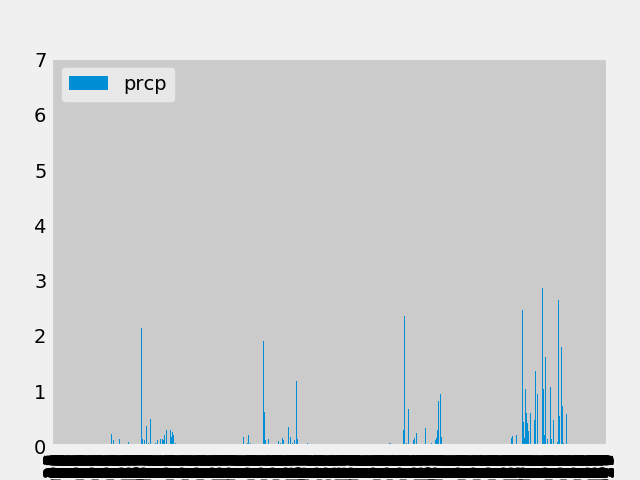

In [14]:

# plot the dataframe

#Plot the Results in a Matplotlib bar chart
df = pd.DataFrame(last_year_prec_df, columns=['date','prcp'])
df.set_index('date', inplace=True)
df.plot.bar()

plt.show()



In [20]:
# ----------------------------------------------------------------------
# Step 6: Calculate the total number of stations
# ----------------------------------------------------------------------
total_stations = pd.read_sql('SELECT COUNT(*) AS "Total Stations" FROM station', 
                             engine)['Total Stations'][0]
print(f"There are {total_stations} weather stations in Hawaii.")

There are 9 weather stations in Hawaii.


In [25]:
# ----------------------------------------------------------------------
# Step 7: Find the most active stations
# ----------------------------------------------------------------------
# pull the stations and observation counts in descending order
query = 'SELECT m.station, s.name, COUNT(m.tobs) AS "Count Observations" \
         FROM measurement m JOIN station s ON s.station = m.station \
         GROUP BY m.station ORDER BY COUNT(m.tobs) DESC'
station_obs_count_desc = pd.read_sql(query,engine)

# display station with highest observation count and df of all stations
highest_obs = f'{station_obs_count_desc["station"][0]} {station_obs_count_desc["name"][0]}'
print(f'The station with the highest observation count is {highest_obs}.')
station_obs_count_desc


The station with the highest observation count is USC00519281 WAIHEE 837.5, HI US.


,station,name,Count Observations
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511
